# Some Simple Time Series


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = "../data/raw"


In [2]:
HRB = pd.read_csv(
    os.path.join(DATA_PATH, "hrb.csv"), parse_dates=["Quarter"], index_col=["Quarter"]
)


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


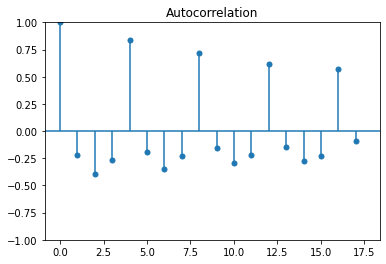

In [3]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()


In [4]:
returns = pd.read_csv(
    os.path.join(DATA_PATH, "returns.csv"), parse_dates=["Date"], index_col=["Date"]
)


The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


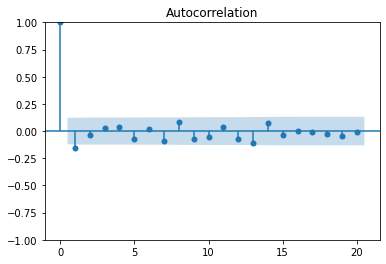

In [5]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from numpy import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns["Adj Close"].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" % (autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96 / sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" % (conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()


The mean is 0.020 and the standard deviation is 0.050


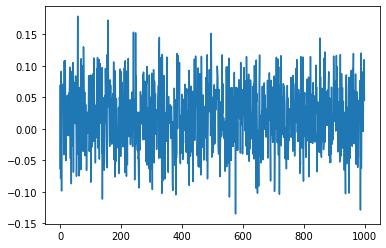

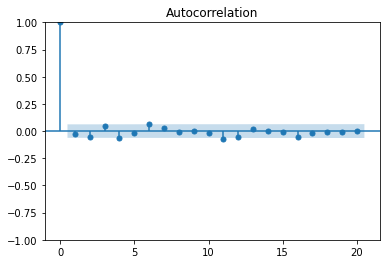

In [6]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" % (mean, std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()


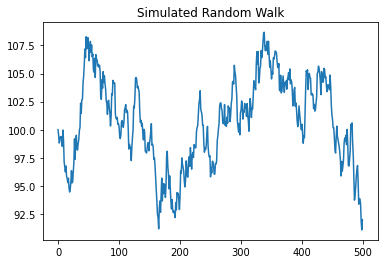

In [7]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0] = 0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()


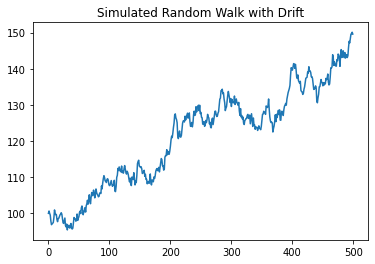

In [8]:
# Generate 500 random steps
steps = np.random.normal(loc=1e-3, scale=1e-2, size=500) + 1

# Set first element to 1
steps[0] = 1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()


In [9]:
AMZN = pd.read_csv(
    os.path.join(DATA_PATH, "amzn.csv"), parse_dates=["Date"], index_col=["Date"]
)


In [10]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN["Adj Close"])
print(results)

# Just print out the p-value
print("The p-value of the test on prices is: " + str(results[1]))


(4.0251685257707415, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


In [11]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret["Adj Close"])
print("The p-value of the test on returns is: " + str(results[1]))


The p-value of the test on returns is: 2.565589808347643e-22


            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


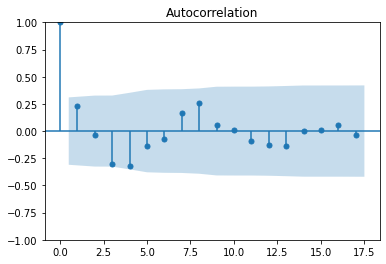

In [12]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()
